In [1]:
from numpy.typing import ArrayLike
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt

from logistic_regression import SGDLogisticRegression

In [2]:
def print_models_metric(models: dict, X: ArrayLike, y: ArrayLike) -> None:
    for label, model in models.items():
        y_pred = model.predict(X)
        y_proba = model.predict_proba(X)
        if len(y_proba.shape) == 2:
            y_proba = y_proba[:, 1]

        print(f"== {label} ==")
        print(f"ROC-AUC: {roc_auc_score(y, y_proba)}")
        print(f"f1: {f1_score(y, y_pred)}")
        print(f"precision: {precision_score(y, y_pred)}")
        print(f"recall: {recall_score(y, y_pred)}")
        print(f"accuracy_score: {accuracy_score(y, y_pred)}\n")

## Подготовка датасета

In [3]:
X, y = make_moons(
    n_samples=1000,
    noise=0.1,
    random_state=42
)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучение моделей и метрики

In [5]:
sgd_model = SGDLogisticRegression(epochs=50, lr=0.001, batch_size=1, verbose=False) # Чистый SGD
batch_model = SGDLogisticRegression(epochs=50, lr=0.01, batch_size=32, verbose=False) # SGD по батчам
fgd_model = SGDLogisticRegression(epochs=50, lr=0.01, verbose=False) # Полный GD

sgd_model.fit(X_train_scaled, y_train)
batch_model.fit(X_train_scaled, y_train)
fgd_model.fit(X_train_scaled, y_train)

models = {
    "SGD Model": sgd_model,
    "BatchGD Model": batch_model,
    "FullGD Model": fgd_model
}

In [6]:
print("======== Метрики моделей ========")
print_models_metric(models, X_test_scaled, y_test)

======== Метрики моделей ========
== SGD Model ==
ROC-AUC: 0.9586958695869587
f1: 0.864321608040201
precision: 0.86
recall: 0.8686868686868687
accuracy_score: 0.865

== BatchGD Model ==
ROC-AUC: 0.9595959595959596
f1: 0.8585858585858586
precision: 0.8585858585858586
recall: 0.8585858585858586
accuracy_score: 0.86

== FullGD Model ==
ROC-AUC: 0.955995599559956
f1: 0.8527918781725888
precision: 0.8571428571428571
recall: 0.8484848484848485
accuracy_score: 0.855



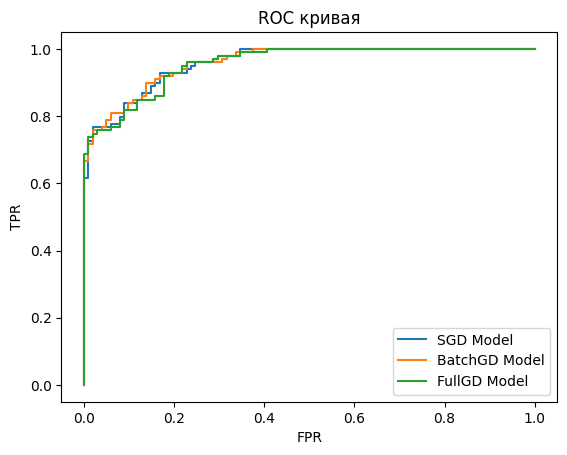

In [7]:
for label, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled))
    plt.plot(fpr, tpr, label=label)
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC кривая')
plt.show()

## Сравнение с LogisticRegression и SGDClassifier из sklearn

In [8]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [9]:
sklearn_lr = LogisticRegression(penalty=None).fit(X_train_scaled, y_train)
sklearn_sgd_lr = SGDClassifier(
    loss="log_loss", max_iter=50, penalty=None, eta0=0.001, learning_rate="constant"
).fit(X_train_scaled, y_train)

models = {
    "My SGD LR": sgd_model,
    "sklearn LogisticRegression": sklearn_lr,
    "sklearn SGDClassifier": sklearn_sgd_lr,
}

In [10]:
print("======== Сравнение с моделями sklearn ========")
print_models_metric(models, X_test_scaled, y_test)

======== Сравнение с моделями sklearn ========
== My SGD LR ==
ROC-AUC: 0.9586958695869587
f1: 0.864321608040201
precision: 0.86
recall: 0.8686868686868687
accuracy_score: 0.865

== sklearn LogisticRegression ==
ROC-AUC: 0.9572957295729574
f1: 0.8712871287128713
precision: 0.8543689320388349
recall: 0.8888888888888888
accuracy_score: 0.87

== sklearn SGDClassifier ==
ROC-AUC: 0.9591959195919593
f1: 0.8686868686868687
precision: 0.8686868686868687
recall: 0.8686868686868687
accuracy_score: 0.87

